In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
%cd /content/gdrive/MyDrive/데이터마이닝

/content/gdrive/MyDrive/데이터마이닝


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import random
import warnings

In [4]:
import pandas as pd

data = pd.read_csv('data.csv')

In [5]:
# 데이터 확인 
data.head()

,Id,Title,Body,Tags,CreationDate,Y
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE
1,34552974,How to get all the child records from differen...,I am having 4 different tables like \r\nselect...,<sql><sql-server>,2016-01-01 01:44:52,LQ_EDIT
2,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ
3,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ
4,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ


In [6]:
data = data.drop(['Id', 'Tags', 'CreationDate'], axis=1) # Id, Tags
data['Y'] = data['Y'].map({'LQ_CLOSE':0, 'LQ_EDIT': 1, 'HQ':2}) # Y 값을 정수형태로 인코딩
data.head()

,Title,Body,Y
0,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,0
1,How to get all the child records from differen...,I am having 4 different tables like \r\nselect...,1
2,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,2
3,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,2
4,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",2


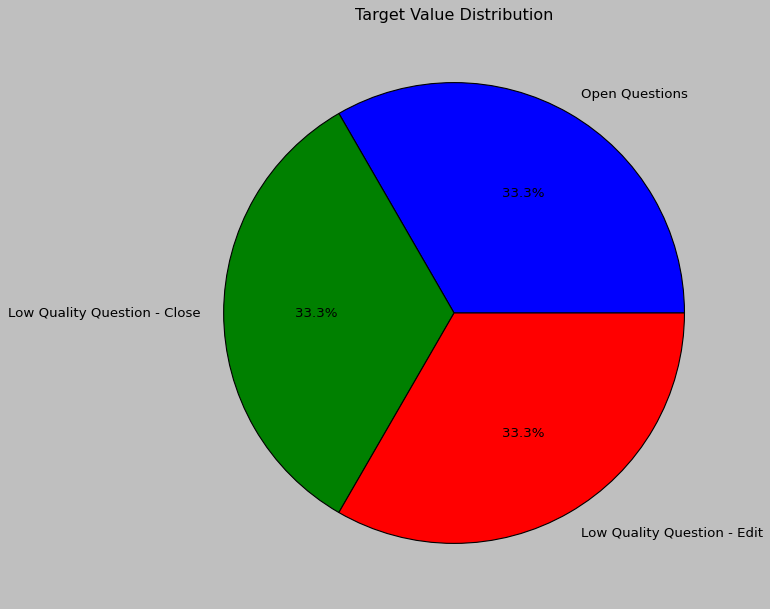

In [7]:
labels = ['Open Questions', 'Low Quality Question - Close', 'Low Quality Question - Edit']
values = [len(data[data['Y'] == 2]), len(data[data['Y'] == 0]), len(data[data['Y'] == 1])]
plt.style.use('classic')
plt.figure(figsize=(16, 9))
plt.pie(x=values, labels=labels, autopct="%1.1f%%")
plt.title("Target Value Distribution")
plt.show()

In [8]:
# title과 body(text) 부분 통합 - classification에 사용할 수 있도록
 
data['text'] = data['Title'] + ' ' + data['Body']
data = data.drop(['Title', 'Body'], axis=1)

In [9]:
data.head()

,Y,text
0,0,Java: Repeat Task Every Random Seconds <p>I'm ...
1,1,How to get all the child records from differen...
2,2,Why are Java Optionals immutable? <p>I'd like ...
3,2,Text Overlay Image with Darkened Opacity React...
4,2,Why ternary operator in swift is so picky? <p>...


In [10]:
# 질문에 code가 포함되어 있으므로 code 부분을 제거

import re

code_start = '<code>'
code_end   = '</code>'

def get_codes(content):
    
    if('<code>' not in content):
        return None
    
    code_list = []
    
    loop_counter = 0
    while(code_start in content):

        code_start_index = content.index(code_start)
        if(code_end not in content):
            code_end_index = len(content)
        else:
            code_end_index = content.index(code_end)

        substring_1 = content[code_start_index : (code_end_index + len(code_end) )]
 
        code_list.append(substring_1)
        
        content = content.replace(substring_1, '')
        
        loop_counter += 1

    
    return ' '.join(code_list)

In [11]:
# 데이터 깔끔하게 정리 (특수문자 제거, 소문자 변환...등)

def  clean_text(content):
    
    content = content.lower()
    
    content = re.sub('<.*?>+', '', content)
    
    content = re.sub(r"(@[A-Za-z0-9]+)|^rt|http.+?", "", content)
    content = re.sub(r"(\w+:\/\/\S+)", "", content)
    content = re.sub(r"([^0-9A-Za-z \t])", " ", content)
    content = re.sub(r"^rt|http.+?", "", content)
    content = re.sub(" +", " ", content)

    # remove numbers
    content = re.sub(r"\d+", "", content)
    
    return content

# Clean the data
def clean_text_simple(text):
    text = text.lower()
    text = re.sub(r'[^(a-zA-Z)\s]','', text)
    return text

def get_non_codes(content):
    
    loop_counter = 0
    while(code_start in content):

        code_start_index = content.index(code_start)
        if(code_end not in content):
            code_end_index = len(content)
        else:
            code_end_index = content.index(code_end)

        substring_1 = content[code_start_index : (code_end_index + len(code_end) )]

        content = content.replace(substring_1, ' ')
        
        loop_counter += 1
        
    content = clean_text_simple(content)
    content = clean_text(content)

    return content

In [12]:
data['code'] = data['text'].apply(get_codes)
data['content'] = data['text'].apply(get_non_codes)

In [13]:
data.head()

,Y,text,code,content
0,0,Java: Repeat Task Every Random Seconds <p>I'm ...,None,java repeat task every random seconds pim alre...
1,1,How to get all the child records from differen...,None,how to get all the child records from differen...
2,2,Why are Java Optionals immutable? <p>I'd like ...,None,why are java optionals immutable pid like to u...
3,2,Text Overlay Image with Darkened Opacity React...,<code>//component for article preview touchabl...,text overlay image with darkened opacity react...
4,2,Why ternary operator in swift is so picky? <p>...,"<code>return x == 0? """" : ""Hello""\n</code> <co...",why ternary operator in swift is so picky pthe...


In [14]:
data = data.drop(['text', 'code'], axis=1)

In [15]:
data.head()

,Y,content
0,0,java repeat task every random seconds pim alre...
1,1,how to get all the child records from differen...
2,2,why are java optionals immutable pid like to u...
3,2,text overlay image with darkened opacity react...
4,2,why ternary operator in swift is so picky pthe...


In [16]:
data['content'] = data['content'].apply(lambda x:str(x).split())

In [17]:
data.head()

,Y,content
0,0,"[java, repeat, task, every, random, seconds, p..."
1,1,"[how, to, get, all, the, child, records, from,..."
2,2,"[why, are, java, optionals, immutable, pid, li..."
3,2,"[text, overlay, image, with, darkened, opacity..."
4,2,"[why, ternary, operator, in, swift, is, so, pi..."


In [18]:
def remove_short_words(content):

    new_content_list = []
    for item in content:
        
        if(len(item) > 2):
            new_content_list.append(item)
    
    return new_content_list

In [19]:
data['content'] = data['content'].apply(remove_short_words)

In [20]:
# 불용어 제거
from collections import Counter
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords #일반적으로 분석대상이 아닌 단어들

english_stops = stopwords.words('english') #영어 불용어를 가져옴

def remove_stopwords(content):

    new_content_list = []
    for item in content:
        if not item in english_stops:
            new_content_list.append(item)
    
    return new_content_list

data['content'] = data['content'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
data.head()

,Y,content
0,0,"[java, repeat, task, every, random, seconds, p..."
1,1,"[get, child, records, different, tables, based..."
2,2,"[java, optionals, immutable, pid, like, unders..."
3,2,"[text, overlay, image, darkened, opacity, reac..."
4,2,"[ternary, operator, swift, picky, pthe, questi..."


In [22]:
#data.to_csv('train.csv', index=False)

In [23]:
data_list = data['content'][0]

In [24]:
data_string = ' '.join([str(item) for item in data_list])

In [25]:
data_string

'java repeat task every random seconds pim already familiar repeating tasks every seconds using javautiltimer javautiltimertask lets say want print hello world console every random seconds unfortunately bit rush dont code show far help would apriciated'

In [26]:
def listtostring(content):
    for item in content:
      data_string = ' '.join([str(item) for item in content])
    return data_string

In [27]:
data['content'] = data['content'].apply(listtostring)

In [28]:
data

,Y,content
0,0,java repeat task every random seconds pim alre...
1,1,get child records different tables based given...
2,2,java optionals immutable pid like understand j...
3,2,text overlay image darkened opacity react nati...
4,2,ternary operator swift picky pthe question sim...
...,...,...
59995,0,correct way multiply integer double try multip...
59996,0,make application outside visual studio pim new...
59997,1,django showing error try open new page hyperli...
59998,0,php getting content php page controller inside...


In [30]:
data.to_csv('train.csv', index=False)

In [6]:
train = data['content']

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the vectorizer, fit on training set, transform on test set
vectorizer = TfidfVectorizer()
train = vectorizer.fit_transform(train)